In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def sort_legend_items(items):
    return sorted(items, key=lambda x: (len(x), x))

def plot_rejections(df, 
                    variable_to_vary, 
                    metric_column='acc', 
                    filter_values=None, 
                    acc_range=None,
                    title=None,
                    PMNN=False,
                    rejection=30,
                    classes=None):
    # Identify the columns that will remain constant
    if not PMNN:
        remaining_columns = ['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']
    else:
        remaining_columns = ['particle_geom', 'particle_dim']
        
    remaining_columns.remove(variable_to_vary)

    # If filtering values are provided, apply them to the DataFrame
    if filter_values:
        indexer = pd.IndexSlice
        for col, val in filter_values.items():
            df = df.loc[df.index.get_level_values(col) == val]


    # Loop over each class to plot a separate graph
    for class_label in classes:
        print(class_label)
        plt.figure(figsize=(10, 8), facecolor='white')
        sorted_handles_labels = []
        for name, group in df.groupby(remaining_columns):
            if PMNN:
                name_label = correct_string_to_latex(name)
                leg_title = 'Particle-Level Geom.'
            else:
                if 'particle_geom' in filter_values:
                    name_label = correct_string_to_latex(name[-1])
                    leg_title = 'Jet-Level Geom.'
                else:
                    name_label = correct_string_to_latex(name[0])
                    leg_title = 'Particle-Level Geom.'
                    
            mean_col = f'{class_label}_rejection_{rejection}_mean'
            std_col = f'{class_label}_rejection_{rejection}_std'
            
            if mean_col in group.columns and std_col in group.columns:
                mean_values = group[mean_col]
                std_values = group[std_col]
                
                mean_values = mean_values.sort_index()
                std_values = std_values.sort_index()
                
                line = plt.errorbar(
                            mean_values.index.get_level_values(variable_to_vary), 
                            mean_values.values, 
                            yerr=std_values.values, 
                            fmt='o-', 
                            label=f"{name_label}",
                            linewidth=6,
                            markersize=10
                        )
                # Append the handle and label to the list
                sorted_handles_labels.append((line, f"{name_label}"))

        x_label = 'Particle-Level Dim' if variable_to_vary == 'particle_dim' else 'Jet-Level Dim'
        
        # Extract handles and labels after plotting
        def sort_legend_items(items):
            return sorted(items, key=lambda x: (len(x), x))

        handles, labels = zip(*sorted_handles_labels)
        sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: (len(x[1]), x[1].lower()))
        sorted_handles, sorted_labels = zip(*sorted_handles_labels)

#         plt.legend(sorted_handles, sorted_labels, loc='lower right', fontsize=12)
        plt.tight_layout()
        plt.xscale('log', base=2)
        ax = plt.gca()
        
        max_x = max(ax.get_lines()[0].get_xdata())
        last_tick_power = int(np.log2(max_x))
        ticks = [2**i for i in range(0, last_tick_power + 1)]
        plt.xlabel(x_label, fontsize=50)
        plt.ylabel(f'Rej$_{{{rejection}\%}}$', fontsize=50)
        
        ax.tick_params(axis='x', which='major', labelsize=30, labelcolor='black', direction='out', length=6)
        ax.tick_params(axis='y', which='major', labelsize=30, labelcolor='black', direction='in', length=4)
        plt.setp(ax.get_yticklabels(), rotation=45, ha="right")

        if acc_range is not None:
            plt.ylim(*acc_range)

        plt.show()

    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(3, 2))  
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.axis('off')

    # Use the sorted handles and labels to create the legend
    
    
    ax_legend.legend(sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=2)
    plt.show()

def correct_string_to_latex(s):
    terms = s.split('x')
    temp_str = ''
    latex_terms = []
    i = 0
    while i < len(terms):
        base = terms[i]
        latex_term = f"\\mathbb{{{base.capitalize()}}}"
        i = i + 1
        temp_str = temp_str + latex_term
        if len(terms) > i:
            temp_str = temp_str + ' \\times '
    latex_string = ' \\times '.join(latex_terms)
    return f"${temp_str}$"


In [197]:
def plot_acc(df, 
                    variable_to_vary, 
                    metric_column='acc', 
                    filter_values=None, 
                    acc_range=None,
                    title=None,
                    PMNN=False,
                    rejection=30,
                    classes=None):
    # Identify the columns that will remain constant
    if not PMNN:
        remaining_columns = ['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']
    else:
        remaining_columns = ['particle_geom', 'particle_dim']
        
    remaining_columns.remove(variable_to_vary)

    # If filtering values are provided, apply them to the DataFrame
    if filter_values:
        indexer = pd.IndexSlice
        for col, val in filter_values.items():
            df = df.loc[df.index.get_level_values(col) == val]

    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '*', 'x']
    
    all_caplines, all_bars,all_labels = [],[],[]
    
    # Loop over each class to plot a separate graph
    for class_label in classes:
        print(class_label)
        plt.figure(figsize=(10, 8), facecolor='white',dpi = 300)
        sorted_handles_labels = []
        for i, (name, group) in enumerate(df.groupby(remaining_columns)):
            if PMNN:
                name_label = correct_string_to_latex(name)
                leg_title = 'Particle-Level Geom.'
            else:
                if 'particle_geom' in filter_values:
                    name_label = correct_string_to_latex(name[-1])
                    leg_title = 'Jet-Level Geom.'
                else:
                    name_label = correct_string_to_latex(name[0])
                    leg_title = 'Particle-Level Geom.'
                    
            mean_col = 'acc_mean'
            std_col = 'acc_std'
            if mean_col in group.columns:
                mean_values = group[mean_col]
                mean_values = mean_values.sort_index()
                std_values = group[std_col]
                std_values = std_values.sort_index()

                
                line, caplines, bars = plt.errorbar(
                            mean_values.index.get_level_values(variable_to_vary), 
                            100*mean_values.values, 
                            yerr=100*std_values.values,
                            marker=markers[i],
                            label=f"{name_label}",
                            linewidth=4,
                            markersize=14
                        )
                label = f"{name_label}"
                all_labels.append(label)
                
                all_caplines.append(caplines)
                all_bars.append(bars)
#                 line = plt.plot(
#                             mean_values.index.get_level_values(variable_to_vary), 
#                             100*mean_values.values, 
#                             marker=markers[i],
# #                             linestyle='o-', 
#                             label=f"{name_label}",
#                             linewidth=4,
#                             markersize=14
#                         )
                
                # Append the handle and label to the list
                sorted_handles_labels.append((line, f"{name_label}"))

        x_label = 'Particle-Level Dim' if variable_to_vary == 'particle_dim' else 'Jet-Level Dim'
        
        # Extract handles and labels after plotting
        handles, labels = zip(*sorted_handles_labels)
        sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: (len(x[1]), x[1].lower()))
        sorted_handles, sorted_labels = zip(*sorted_handles_labels)

#         plt.legend(sorted_handles, sorted_labels, loc='lower right', fontsize=12)
        plt.tight_layout()
        plt.xscale('log', base=2)
        ax = plt.gca()
        plt.grid(True)
        max_x = max(ax.get_lines()[0].get_xdata())
        last_tick_power = int(np.log2(max_x))
        ticks = [2**i for i in range(0, last_tick_power + 1)]
        plt.xlabel(x_label, fontsize=25)
        plt.ylabel(f'Accuracy (%))', fontsize=25)
        
        ax.tick_params(axis='x', which='major', labelsize=30, labelcolor='black', direction='out', length=6)
        ax.tick_params(axis='y', which='major', labelsize=30, labelcolor='black', direction='in', length=4)
        plt.setp(ax.get_yticklabels(), rotation=45, ha="right")
        lines = ax.get_lines()
        if acc_range is not None:
            plt.ylim(*acc_range)
        if title is not None:
            plt.title(title)
        plt.show()
        plt.close()

    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(3, 2))  
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.axis('off')

    # Use the sorted handles and labels to create the legend
    ax_legend.legend(sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=2)
    plt.show()
    
    return line, all_caplines, all_bars, all_labels

In [36]:
def average_top_2_for_each(df):
    # Initialize an empty list to store the averaged rows
    averaged_rows = []

    # Get the unique combinations of 'particle_geom' and 'particle_dim'
    unique_combinations = df[['particle_geom', 'particle_dim']].drop_duplicates()

    # Iterate through each combination
    for _, row in unique_combinations.iterrows():
        particle_geom = row['particle_geom']
        particle_dim = row['particle_dim']

        # Filter the DataFrame for the current combination
        filtered_df = df[(df['particle_geom'] == particle_geom) & (df['particle_dim'] == particle_dim)]

        # Sort by 'overall_accuracy' and take the top 2 rows
        top_2 = filtered_df.nlargest(2, 'overall_accuracy')

        # Compute the average of the top 2 rows
        averaged_row = top_2.mean()
        # Compute the average of the top 2 rows
        std_1 = top_2.iloc[0]['acc_std']
        std_2 = top_2.iloc[1]['acc_std']
        propagated_std = np.sqrt(std_1**2 + std_2**2) / 2

        # Set 'acc_std' to the propagated uncertainty
        averaged_row['acc_std'] = propagated_std
        # Add the particle_geom and particle_dim back to the averaged row
        averaged_row['particle_geom'] = particle_geom
        averaged_row['particle_dim'] = particle_dim

        # Append the averaged row to the list
        averaged_rows.append(averaged_row)

    # Create a new DataFrame from the averaged rows
    averaged_df = pd.DataFrame(averaged_rows)

    return averaged_df

H4q


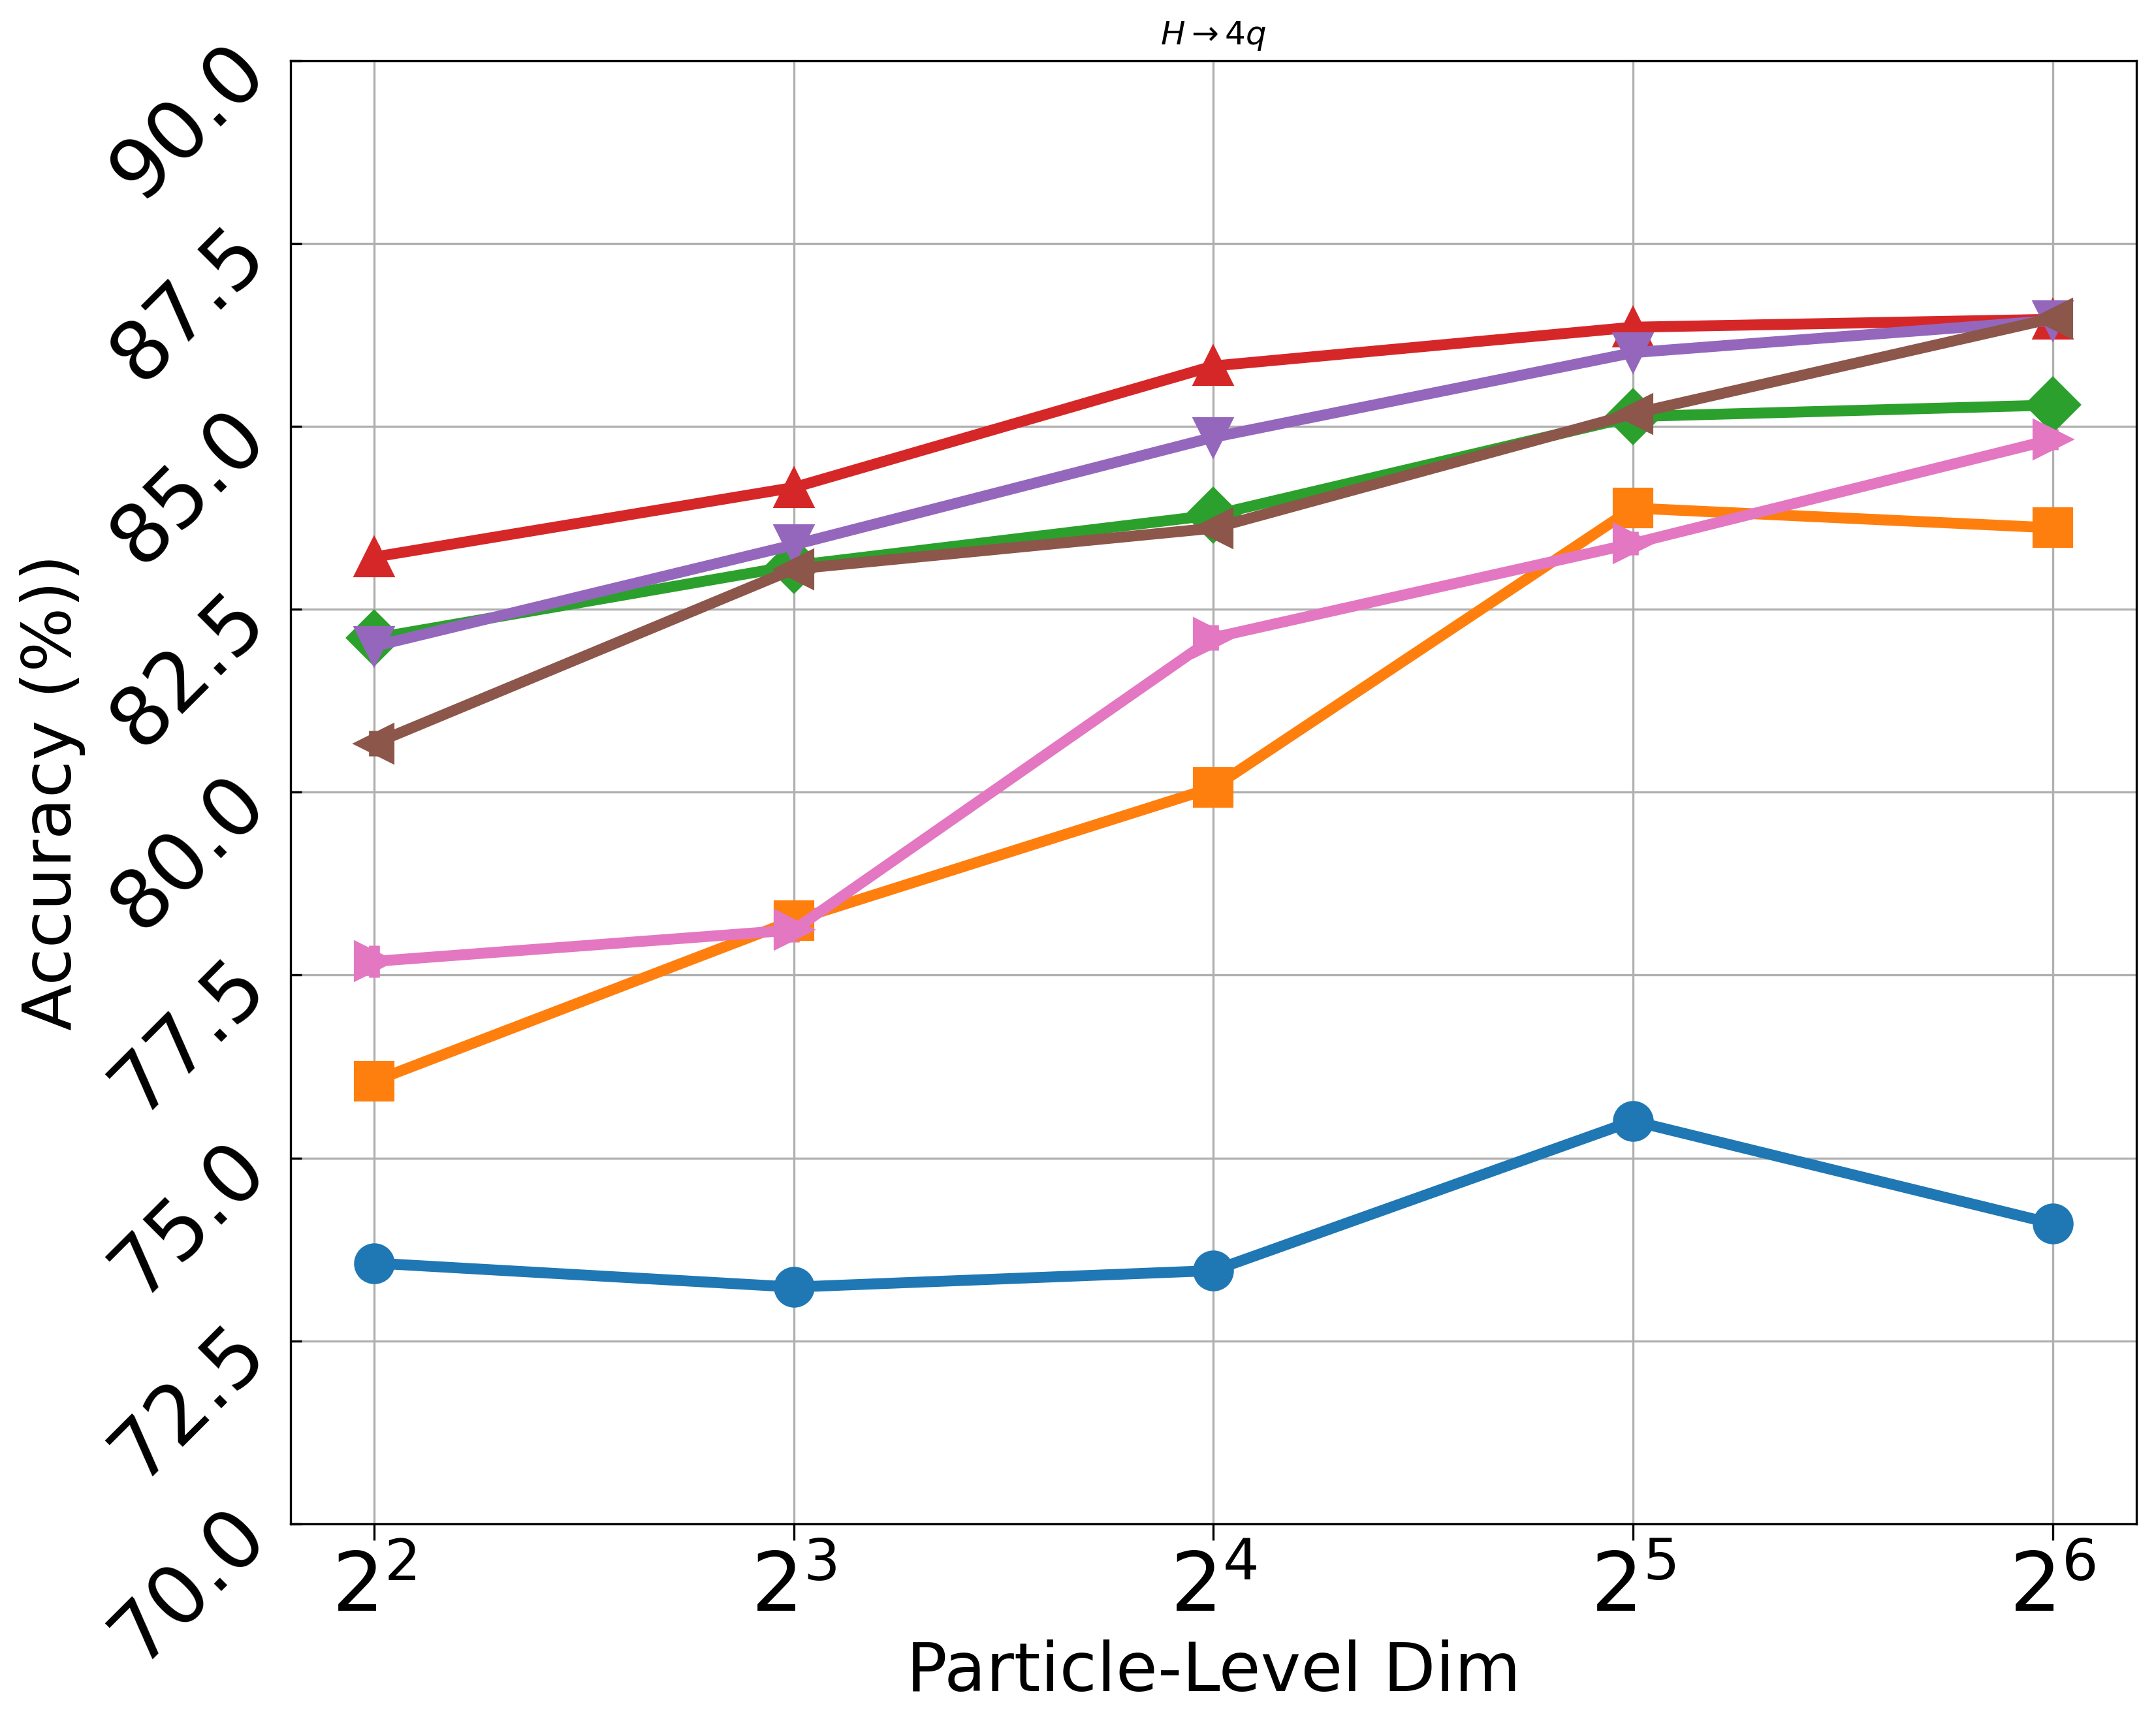

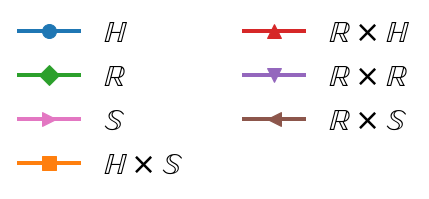

In [198]:
import pandas as pd
import warnings
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')


# Load the DataFrame
results_df = pd.read_csv('JetClass_PMNN_h4q_processed_performance.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim']] = split_columns.iloc[:, 1:3]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
# results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
# Define a function to average the top 2 'overall_accuracy' for each unique (particle_geom, particle_dim) combination

# Apply the function to the DataFrame
averaged_df = average_top_2_for_each(results_df)

# Drop the now redundant columns 'particle_geom' and 'particle_dim' if needed
# 
# Assign the result back to results_df or keep it as a new DataFrame
results_df = averaged_df

index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
results_df.drop(columns=['particle_geom', 'particle_dim'], inplace=True)

results_df#.nlargest(2, 'overall_accuracy')

JetClass_df = results_df
# Print or display the DataFrame to check the structure
# print(results_df.head())
    
signals = ['H4q']
line_h4q, caplines_h4q, bars_h4q,labels_h4q = plot_acc(JetClass_df,title = f'$H \\rightarrow 4q $',rejection=50,classes = signals, variable_to_vary='particle_dim',PMNN = True, acc_range = [70,90])

In [183]:
line_h4q.get_label()

'_nolegend_'

tbqq


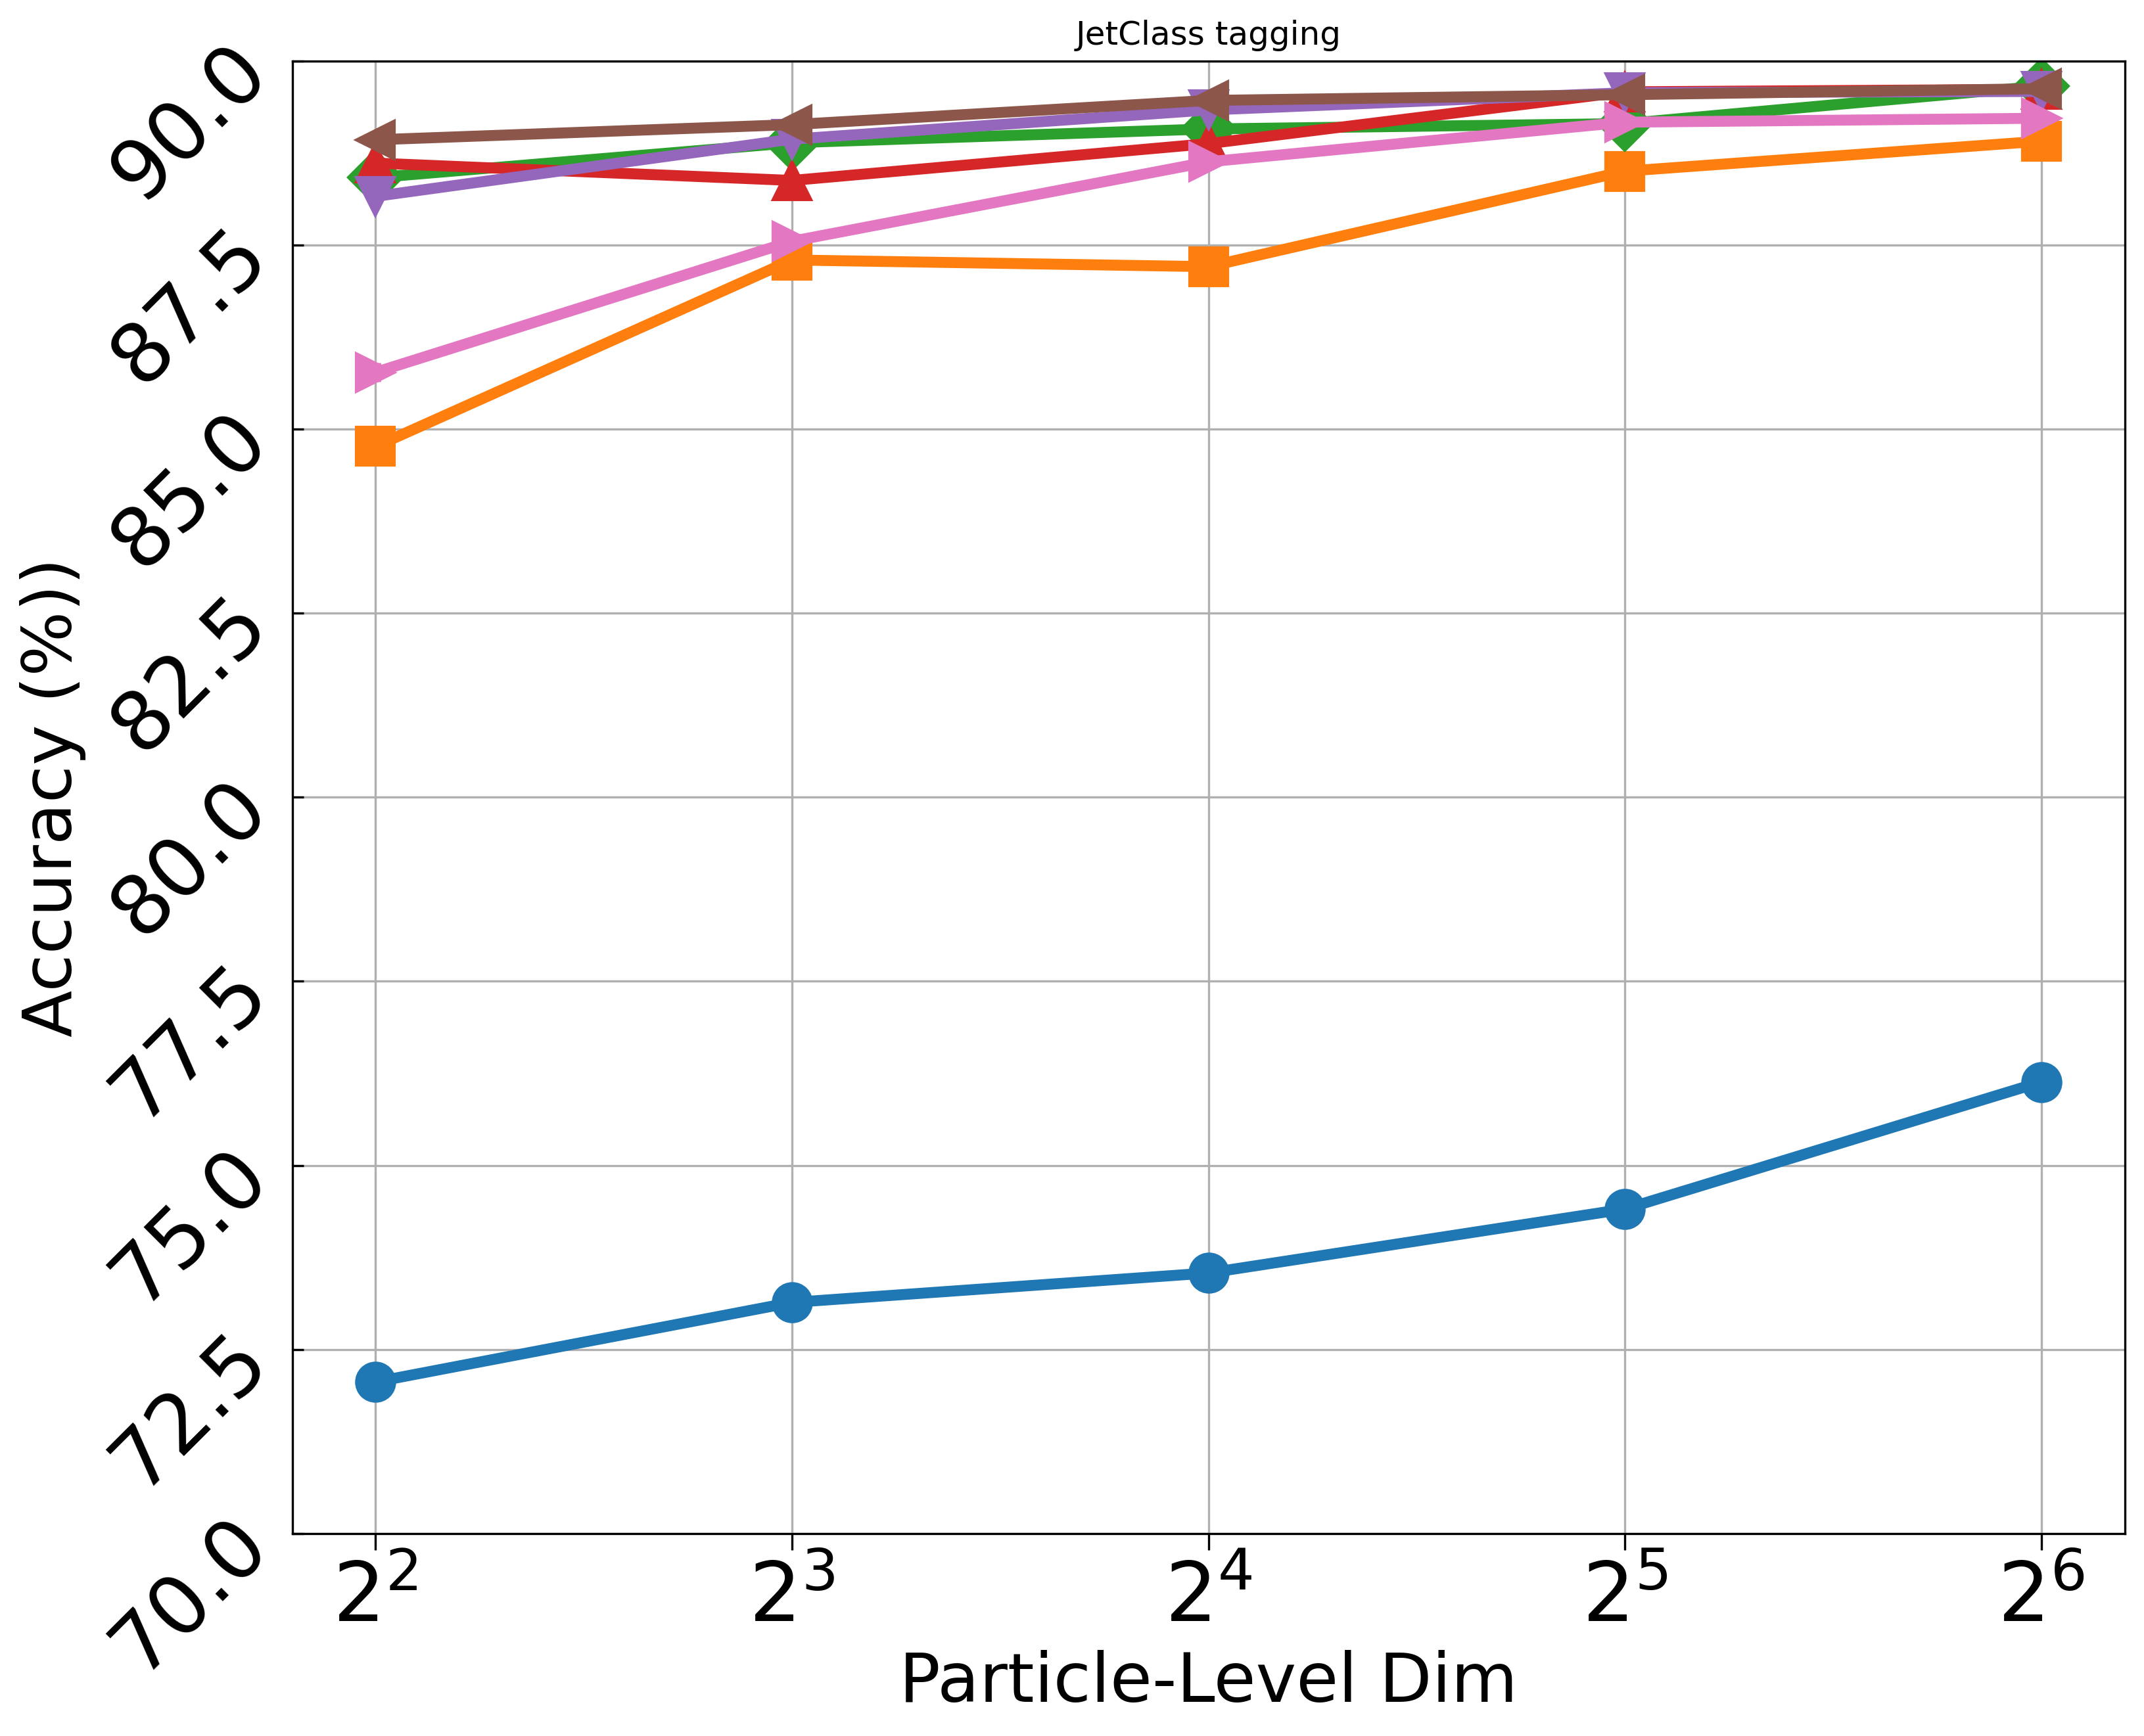

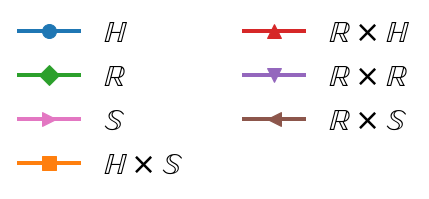

In [200]:
import pandas as pd
import warnings
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the DataFrame
results_df = pd.read_csv('JetClass_PMNN_tbqq_processed_performance.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim']] = split_columns.iloc[:, 1:3]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
# results_df['jet_dim'] = results_df['jet_dim'].astype(int)

# results_df['particle_dim'] = results_df.apply(
#     lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
#     axis=1
# )

# # Multiply 'jet_dim' by 2 if the length of 'jet_geom' is greater than 1
# results_df['jet_dim'] = results_df.apply(
#     lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
#     axis=1
# )


# Remove duplicates by keeping the row with the highest overall_accuracy
# results_df = results_df.sort_values('overall_accuracy', ascending=False)
# .drop_duplicates(
#     subset=['particle_geom', 'particle_dim'], keep='first'
# )

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
# Define a function to average the top 2 'overall_accuracy' for each unique (particle_geom, particle_dim) combination

def average_top_2_for_each(df):
    # Initialize an empty list to store the averaged rows
    averaged_rows = []

    # Get the unique combinations of 'particle_geom' and 'particle_dim'
    unique_combinations = df[['particle_geom', 'particle_dim']].drop_duplicates()

    # Iterate through each combination
    for _, row in unique_combinations.iterrows():
#         print(row['particle_geom'])
#         print(row['particle_dim'])
        particle_geom = row['particle_geom']
        particle_dim = row['particle_dim']

        # Filter the DataFrame for the current combination
        filtered_df = df[(df['particle_geom'] == particle_geom) & (df['particle_dim'] == particle_dim)]

        # Sort by 'overall_accuracy' and take the top 2 rows
        top_2 = filtered_df.nlargest(2, 'overall_accuracy')
        
        # Compute the average of the top 2 rows
        averaged_row = top_2.mean()
        # Compute the average of the top 2 rows
        std_1 = top_2.iloc[0]['acc_std']
        std_2 = top_2.iloc[1]['acc_std']
        propagated_std = np.sqrt(std_1**2 + std_2**2) / 2

        # Set 'acc_std' to the propagated uncertainty
        averaged_row['acc_std'] = propagated_std
        # Add the particle_geom and particle_dim back to the averaged row
        averaged_row['particle_geom'] = particle_geom
        averaged_row['particle_dim'] = particle_dim

        # Append the averaged row to the list
        averaged_rows.append(averaged_row)

    # Create a new DataFrame from the averaged rows
    averaged_df = pd.DataFrame(averaged_rows)

    return averaged_df
# Apply the function to the DataFrame
averaged_df = average_top_2_for_each(results_df)

# Drop the now redundant columns 'particle_geom' and 'particle_dim' if needed
# 
# Assign the result back to results_df or keep it as a new DataFrame
results_df = averaged_df
results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)
index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
results_df.drop(columns=['particle_geom', 'particle_dim'], inplace=True)

results_df#.nlargest(2, 'overall_accuracy')

JetClass_df = results_df
# Print or display the DataFrame to check the structure
# print(results_df.head())
    
signals = ['tbqq']
line_tbqq, caplines_tbqq, bars_tbqq,labels_tbqq = plot_acc(JetClass_df,title = 'JetClass tagging',rejection=50,classes = signals, variable_to_vary='particle_dim',PMNN = True,acc_range=[70,90])

In [137]:
# Assuming bars_tbqq is a tuple, access the first element
first_bars = bars_tbqq[0]  # Access the first element which should be the LineCollection

# Get x and y data for the line
x_data = first_line.get_xdata()
y_data = first_line.get_ydata()

# Get the error bar segments (each segment is a line corresponding to an error bar)
error_bar_segments = first_bars.get_segments()  # Get segments from the LineCollection

# The error bar segments contain pairs of points [(x0, y0), (x1, y1)]
# We'll extract the y-values from these segments to get the lower and upper bounds
lower_bounds = [seg[0][1] for seg in error_bar_segments]  # The first point in each segment is the lower bound
upper_bounds = [seg[1][1] for seg in error_bar_segments]  # The second point in each segment is the upper bound

# Print the results
print("X Data:", x_data)
print("Y Data:", y_data)
print("Lower Error Bars:", lower_bounds)
print("Upper Error Bars:", upper_bounds)

X Data: [ 4  8 16 32 64]
Y Data: [85.77232 87.55236 88.6318  89.16956 89.2232 ]
Lower Error Bars: [85.64299111072927, 87.43969700518804, 88.52758738655997, 89.07249944158414, 89.12950194879294]
Upper Error Bars: [85.90164888927072, 87.66502299481195, 88.73601261344002, 89.26662055841587, 89.31689805120705]


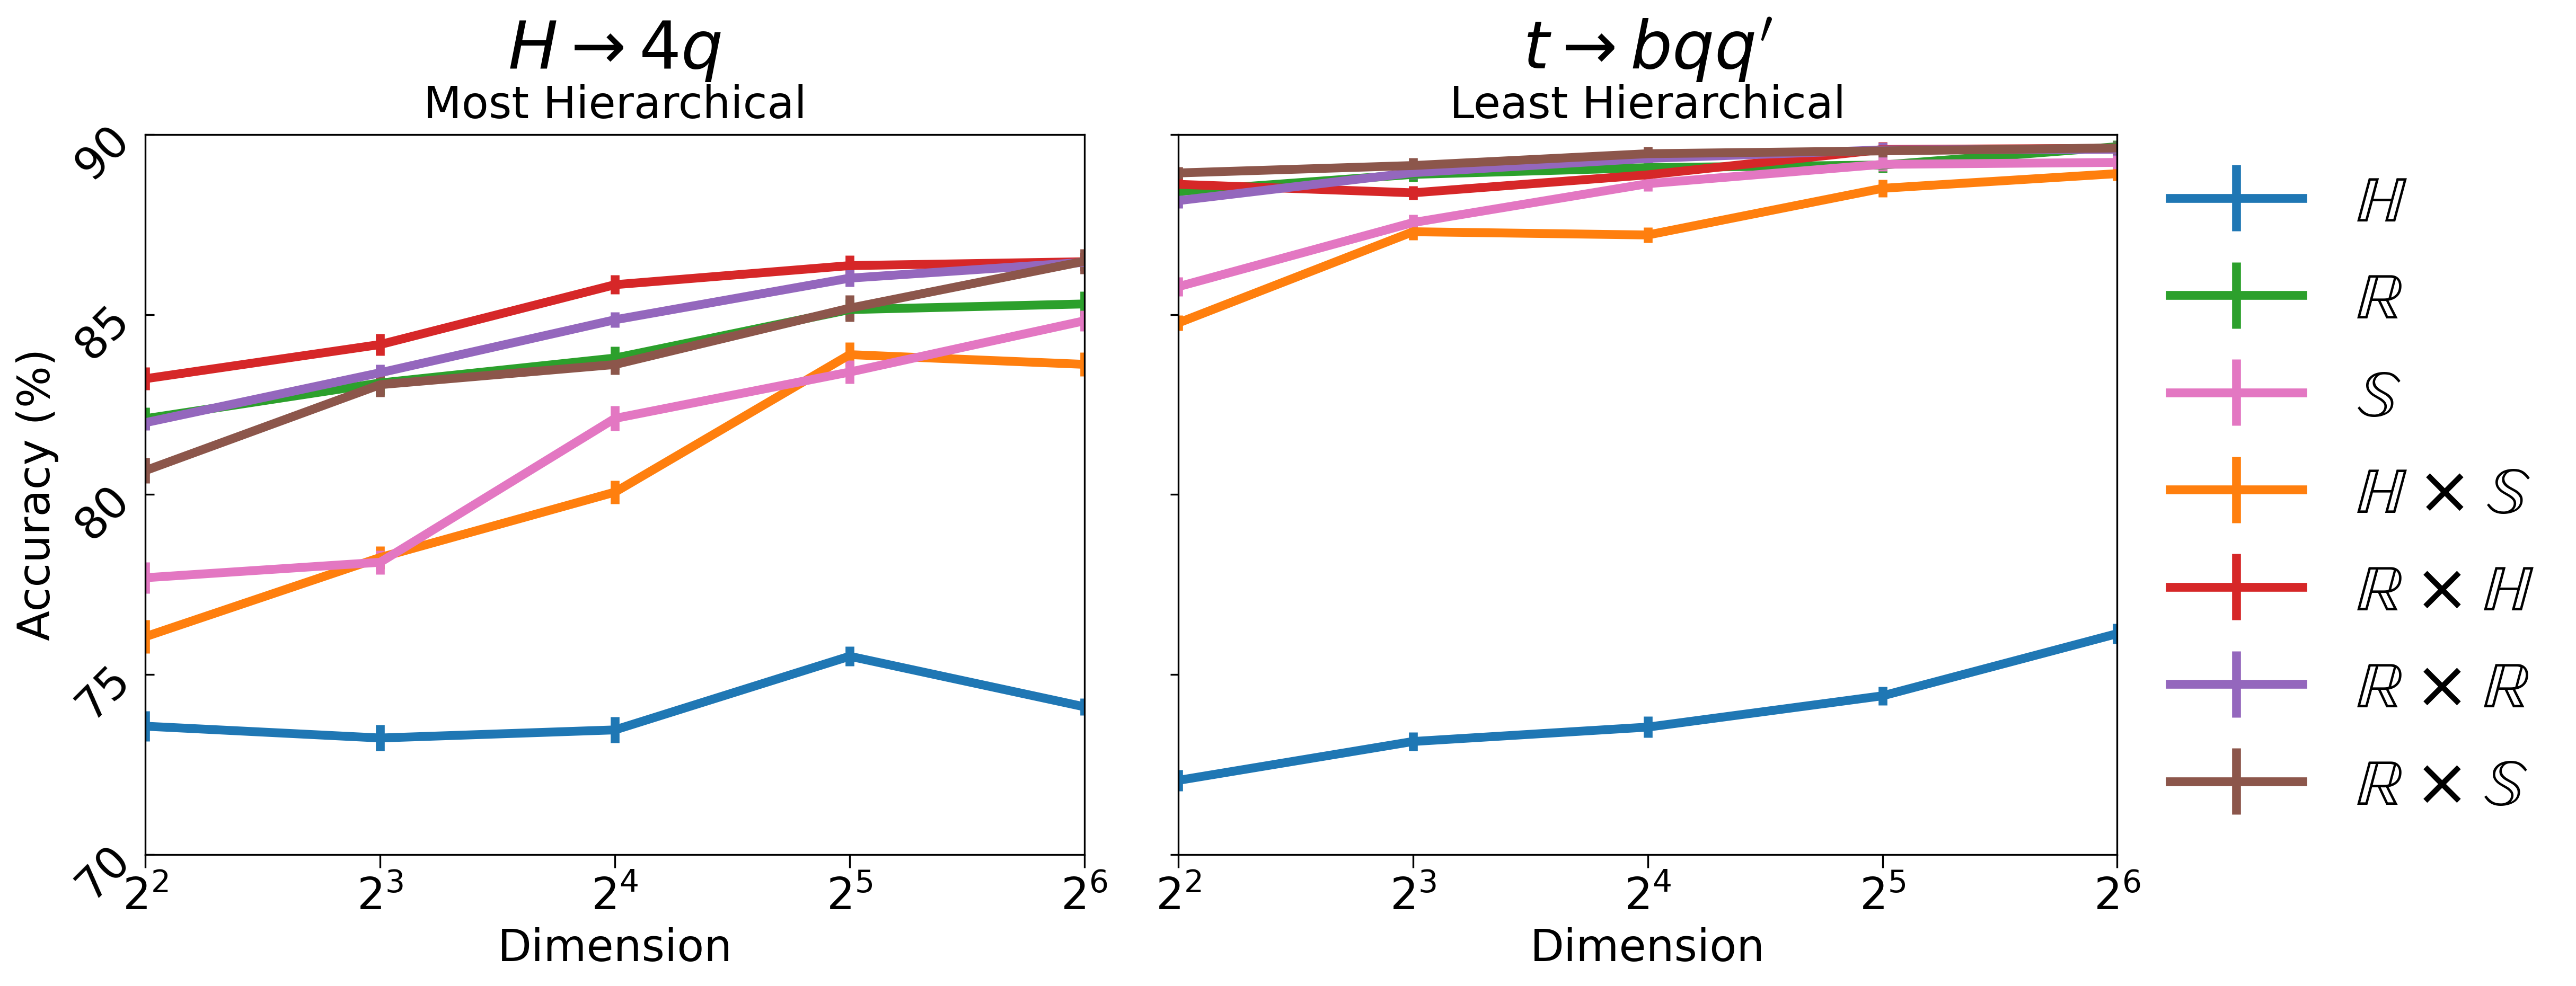

In [201]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator

# Define a list of colors to use
colors = itertools.cycle(plt.cm.tab10.colors)  # Use a color cycle from the 'tab10' colormap

# Create figure with GridSpec to control spacing
fig = plt.figure(figsize=(16, 6), dpi=300)

# Create GridSpec layout with more control over subplot spacing
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace controls the distance between subplots

# Create subplots with more distance between them
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)

markers = ['o', 's', 'p', 'h', '^', 'v', '*', 'x']  # Define markers

# Step 2: Plot the error bars for lines_h4q on ax1 with solid lines and markers
for i, line in enumerate(lines_h4q):  # Now expecting Line2D objects
    x_data = line.get_xdata()  # Get x data
    y_data = line.get_ydata()  # Get y data
    first_bars = bars_h4q[i][0]  # Access the first element which should be the LineCollection

    # Get the error bar segments (each segment is a line corresponding to an error bar)
    error_bar_segments = first_bars.get_segments()  # Get segments from the LineCollection

    lower_bounds = [seg[0][1] for seg in error_bar_segments]  # The first point in each segment is the lower bound
    upper_bounds = [seg[1][1] for seg in error_bar_segments]  # The second point in each segment is the upper bound
    yerr_data = np.array(upper_bounds) -np.array(lower_bounds)
    
    color = next(colors)  # Get the next color from the cycle
    ax1.errorbar(x_data, y_data, yerr=yerr_data, fmt='-',  # Solid line with marker
                 label=line.get_label(), linewidth=4,color=color)

# Step 3: Reset the color cycle for the second set of lines
colors = itertools.cycle(plt.cm.tab10.colors)  # Reset the color cycle

# Step 4: Plot the error bars for lines_tbqq on ax2 with solid lines and markers
for i, line in enumerate(lines_tbqq):  # Now expecting Line2D objects
    x_data = line.get_xdata()  # Get x data
    y_data = line.get_ydata()  # Get y data
    
    # If error bars are stored in a separate list (e.g., yerr_tbqq), you need to pass them here
    first_bars = bars_tbqq[i][0]  # Access the first element which should be the LineCollection

    # Get the error bar segments (each segment is a line corresponding to an error bar)
    error_bar_segments = first_bars.get_segments()  # Get segments from the LineCollection

    lower_bounds = [seg[0][1] for seg in error_bar_segments]  # The first point in each segment is the lower bound
    upper_bounds = [seg[1][1] for seg in error_bar_segments]  # The second point in each segment is the upper bound
    yerr_data = np.array(upper_bounds) -np.array(lower_bounds)

    color = next(colors)  # Get the next color from the cycle
    ax2.errorbar(x_data, y_data, yerr=yerr_data, fmt='-',  # Solid line with marker
                 label=labels_tbqq[i], linewidth=4, color=color)
    

# Step 5: Set the shared y-axis range for both subplots
ax1.set_ylim(70, 90)
ax2.set_ylim(70, 90)
ax1.set_xlim(4, 64)
ax2.set_xlim(4, 64)
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_title(f'$H \\rightarrow 4q$', fontsize=30, pad=30)
ax1.text(0.5, 1.07, "Most Hierarchical", fontsize=20, ha='center', va='top', transform=ax1.transAxes)

ax2.set_title(f'$t \\rightarrow bqq\'$', fontsize=30, pad=30)
ax2.text(0.5, 1.07, "Least Hierarchical", fontsize=20, ha='center', va='top', transform=ax2.transAxes)

ax1.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax1.tick_params(axis='y', which='major', labelsize=20, labelcolor='black', direction='in', length=4)
ax2.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax2.tick_params(labelleft=False)

plt.setp(ax1.get_yticklabels(), rotation=45, ha="right")  # Rotate the y-tick labels by 45 degrees

y_ticks = MultipleLocator(5)  # Set the increment to 5

# Apply the locator to the y-axis
ax1.yaxis.set_major_locator(y_ticks)

# Step 6: Add vertical line to separate the plots visually
fig.subplots_adjust(wspace=0.05)  # Adjust the space between subplots

# Step 7: Label both axes
ax1.set_xlabel("Dimension", fontsize=20)
ax2.set_xlabel("Dimension", fontsize=20)
ax1.set_ylabel("Accuracy (%)", fontsize=20)

# Step 8: Add legends (make sure to avoid duplicates)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combine legends for unique labels
combined_legend = dict(zip(labels_1 + labels_2, lines_1 + lines_2))

# Check if there are any handles and labels to add to the legend
# Sort the legend items
sorted_handles_labels = sorted(zip(combined_legend.values(), combined_legend.keys()), key=lambda x: (len(x[1]), x[1].lower()))

if sorted_handles_labels:  # Ensure there are items to unpack
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)

    # Add the sorted legend to one of the axes (you can adjust which axis displays it)
    ax2.legend(
        sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=1,
        bbox_to_anchor=(1.25, 0.5),  # Positions the legend outside the right edge
        borderaxespad=0
    )

# Show the plot
plt.show()


In [154]:
# Assuming bars_tbqq is a tuple, access the first element
first_bars = bars_tbqq[0]  # Access the first element which should be the LineCollection

# Get x and y data for the line
x_data = first_line.get_xdata()
y_data = first_line.get_ydata()

# Get the error bar segments (each segment is a line corresponding to an error bar)
error_bar_segments = first_bars.get_segments()  # Get segments from the LineCollection

# The error bar segments contain pairs of points [(x0, y0), (x1, y1)]
# We'll extract the y-values from these segments to get the lower and upper bounds
lower_bounds = [seg[0][1] for seg in error_bar_segments]  # The first point in each segment is the lower bound
upper_bounds = [seg[1][1] for seg in error_bar_segments]  # The second point in each segment is the upper bound

# Print the results
print("X Data:", x_data)
print("Y Data:", y_data)
print("Lower Error Bars:", lower_bounds)
print("Upper Error Bars:", upper_bounds)

AttributeError: 'tuple' object has no attribute 'get_segments'

ValueError: not enough values to unpack (expected 2, got 0)

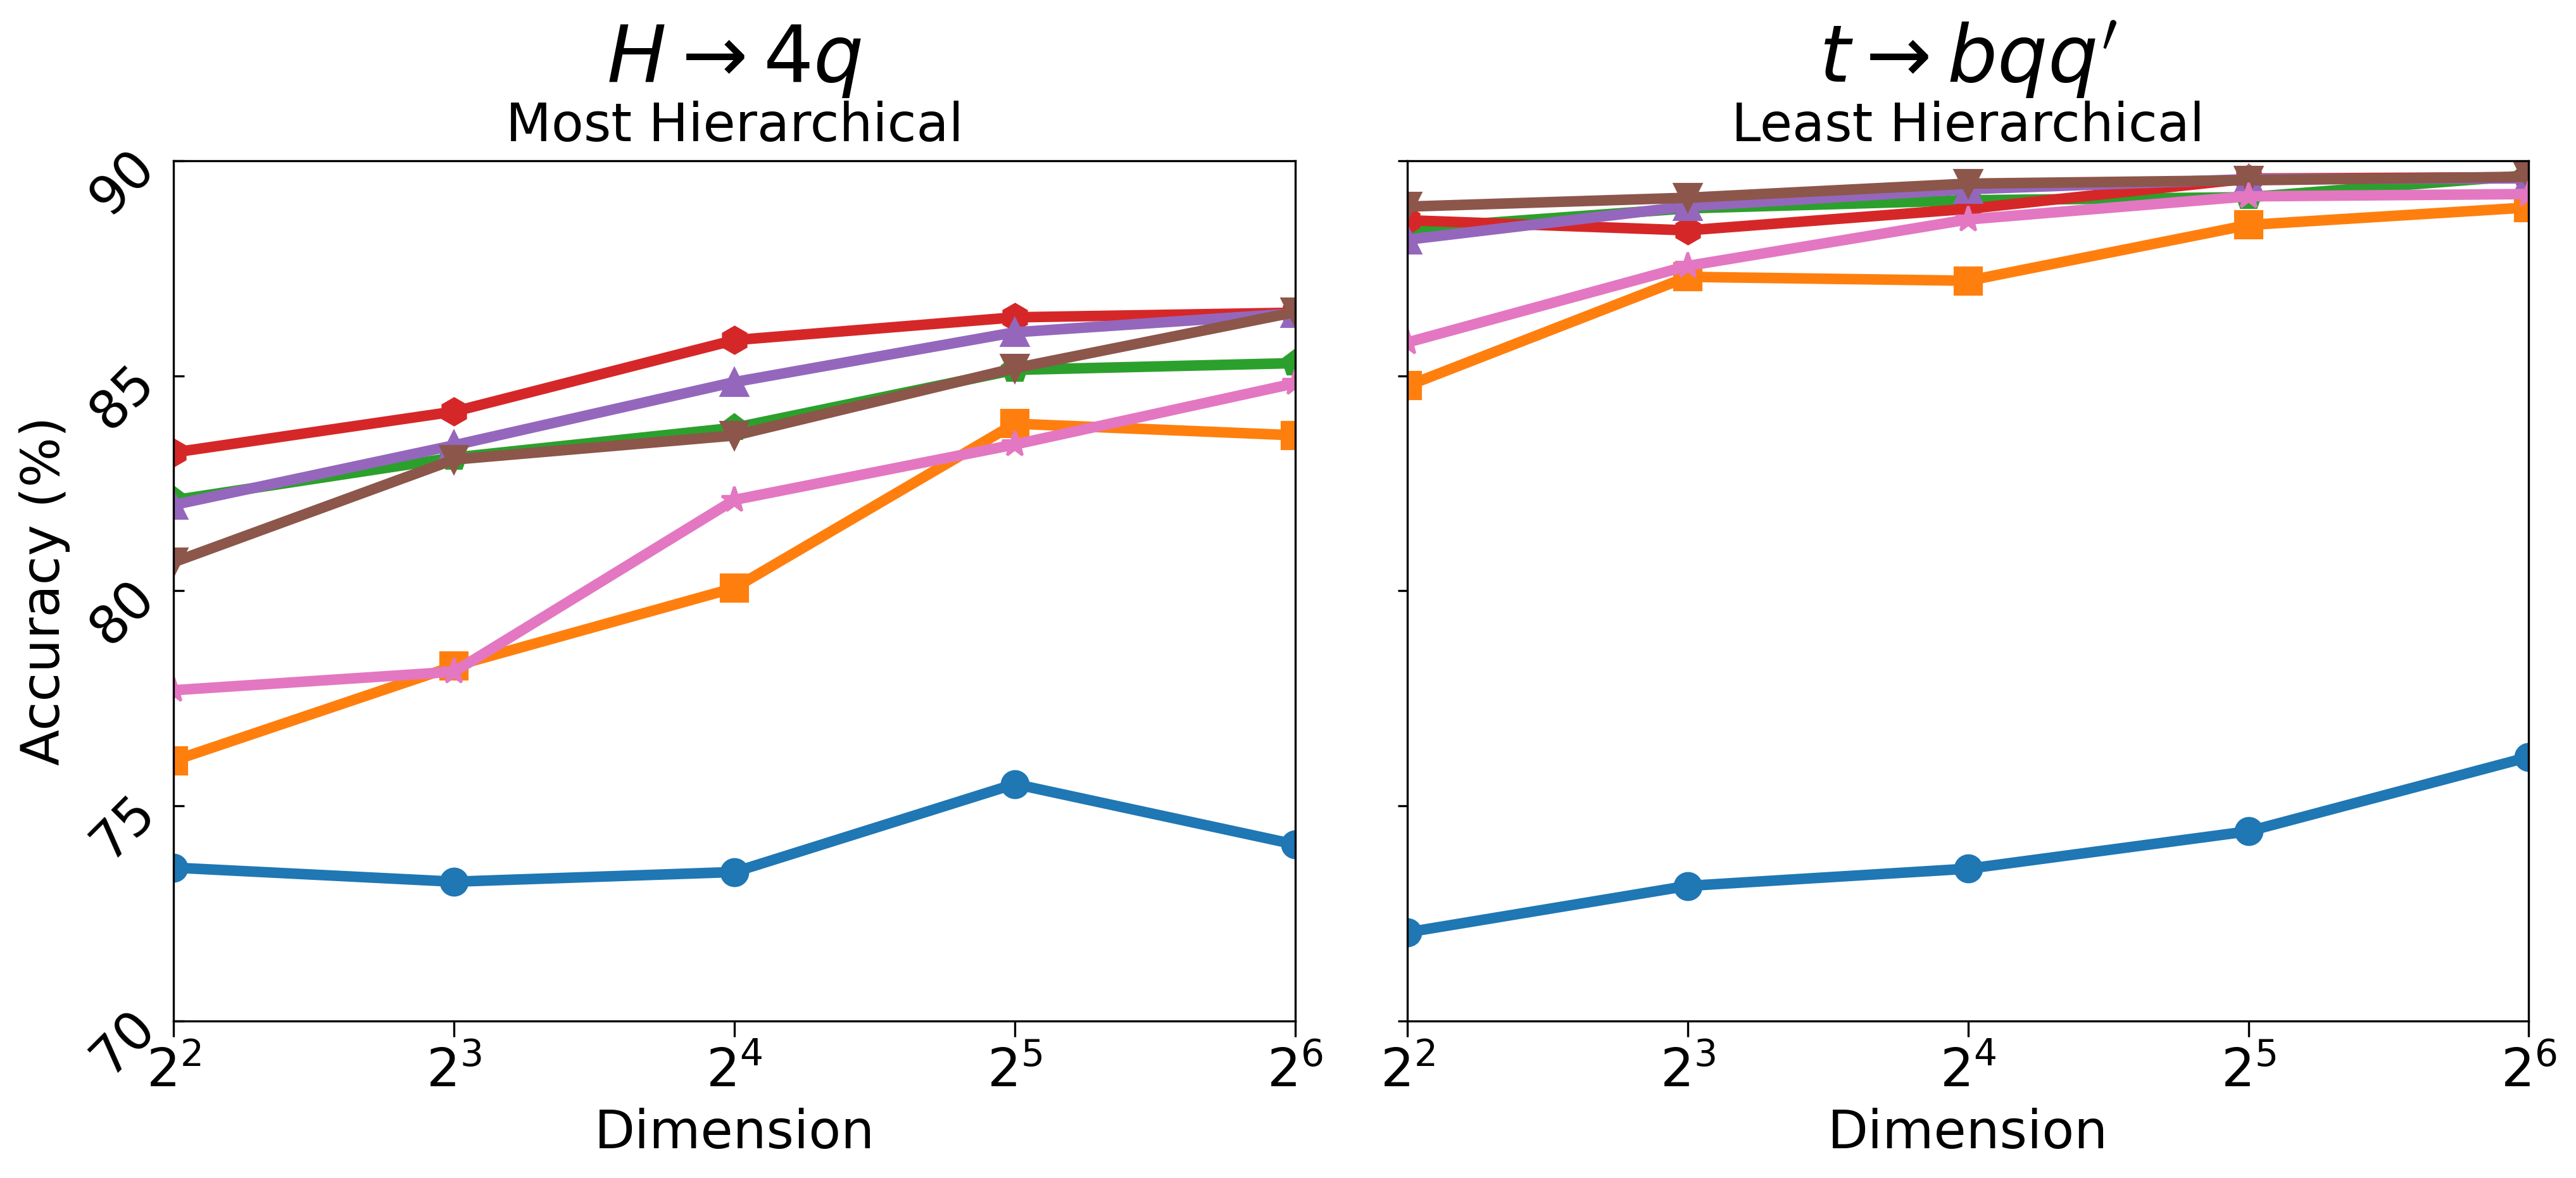

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator



# Assuming lines_h4q and lines_tbqq are lists of Line2D objects from saved plots

# Define a list of colors to use
colors = itertools.cycle(plt.cm.tab10.colors)  # Use a color cycle from the 'tab10' colormap

# Step 1: Set up the figure and two side-by-side subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 10))

# Create figure with GridSpec to control spacing
fig = plt.figure(figsize=(16, 6),dpi = 300)

# Create GridSpec layout with more control over subplot spacing
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace controls the distance between subplots

# Create subplots with more distance between them
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)


markers = ['o', 's','p', 'h','^', 'v',  '*', 'x']


# Step 2: Plot the lines from lines_h4q on ax1 with different colors
for i,line in enumerate(lines_h4q):
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    color = next(colors)  # Get the next color from the cycle
    new_line = Line2D(x_data, y_data, label=line.get_label(),
                      linewidth=4, markersize=10, marker=markers[i],color=color)
    ax1.add_line(new_line)

# Step 3: Reset the color cycle for the second set of lines
colors = itertools.cycle(plt.cm.tab10.colors)  # Reset the color cycle

# Step 4: Plot the lines from lines_tbqq on ax2 with different colors
for i, line in enumerate(lines_tbqq):
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    color = next(colors)  # Get the next color from the cycle
    new_line = Line2D(x_data, y_data, label=line.get_label(),
                      linewidth=4, markersize=10, marker=markers[i],color=color)
    ax2.add_line(new_line)

# Step 5: Set the shared y-axis range for both subplots
ax1.set_ylim(70, 90)
ax2.set_ylim(70, 90)
ax1.set_xlim(4, 64)
ax2.set_xlim(4, 64)
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_title(f'$H \\rightarrow 4q$',fontsize =30, pad =30)
ax1.text(0.5, 1.07, "Most Hierarchical", fontsize=20, ha='center', va='top', transform=ax1.transAxes)


ax2.set_title(f'$t \\rightarrow bqq\'$',fontsize =30,pad =30)
ax2.text(0.5, 1.07, "Least Hierarchical", fontsize=20, ha='center', va='top', transform=ax2.transAxes)




ax1.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax1.tick_params(axis='y', which='major', labelsize=20, labelcolor='black', direction='in', length=4)
ax2.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax2.tick_params(labelleft=False)
# ax1.setp(ax.get_yticklabels(), rotation=45, ha="right")
plt.setp(ax1.get_yticklabels(), rotation=45, ha="right")  # Rotate the y-tick labels by 45 degrees

y_ticks = MultipleLocator(5)  # Set the increment to 5

# Apply the locator to the y-axis
ax1.yaxis.set_major_locator(y_ticks)


# Step 6: Add vertical line to separate the plots visually
fig.subplots_adjust(wspace=0.05)  # Adjust the space between subplots
# ax1.axvline(x=ax1.get_xlim()[1], color='black', linewidth=2)  # Right boundary of ax1
# ax2.axvline(x=ax2.get_xlim()[0], color='black', linewidth=2)  # Left boundary of ax2

# Step 7: Label both axes
ax1.set_xlabel("Dimension",fontsize =20)
ax2.set_xlabel("Dimension",fontsize =20)
ax1.set_ylabel("Accuracy (%)",fontsize =20)

# Step 8: Add legends (make sure to avoid duplicates)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combine legends for unique labels
combined_legend = dict(zip(labels_1 + labels_2, lines_1 + lines_2))
# Step 8: Add legends and sort them by label length and alphabetically
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combine handles and labels from both subplots
handles = lines_1 
labels = labels_1 



# Sort the legend items
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: (len(x[1]), x[1].lower()))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Add the sorted legend to one of the axes (you can adjust which axis displays it)
# ax2.legend(sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=2)
ax2.legend(
    sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=1,
    bbox_to_anchor=(1.25, 0.5),  # Positions the legend outside the right edge
    borderaxespad=0
)


# Show the plot
plt.show()


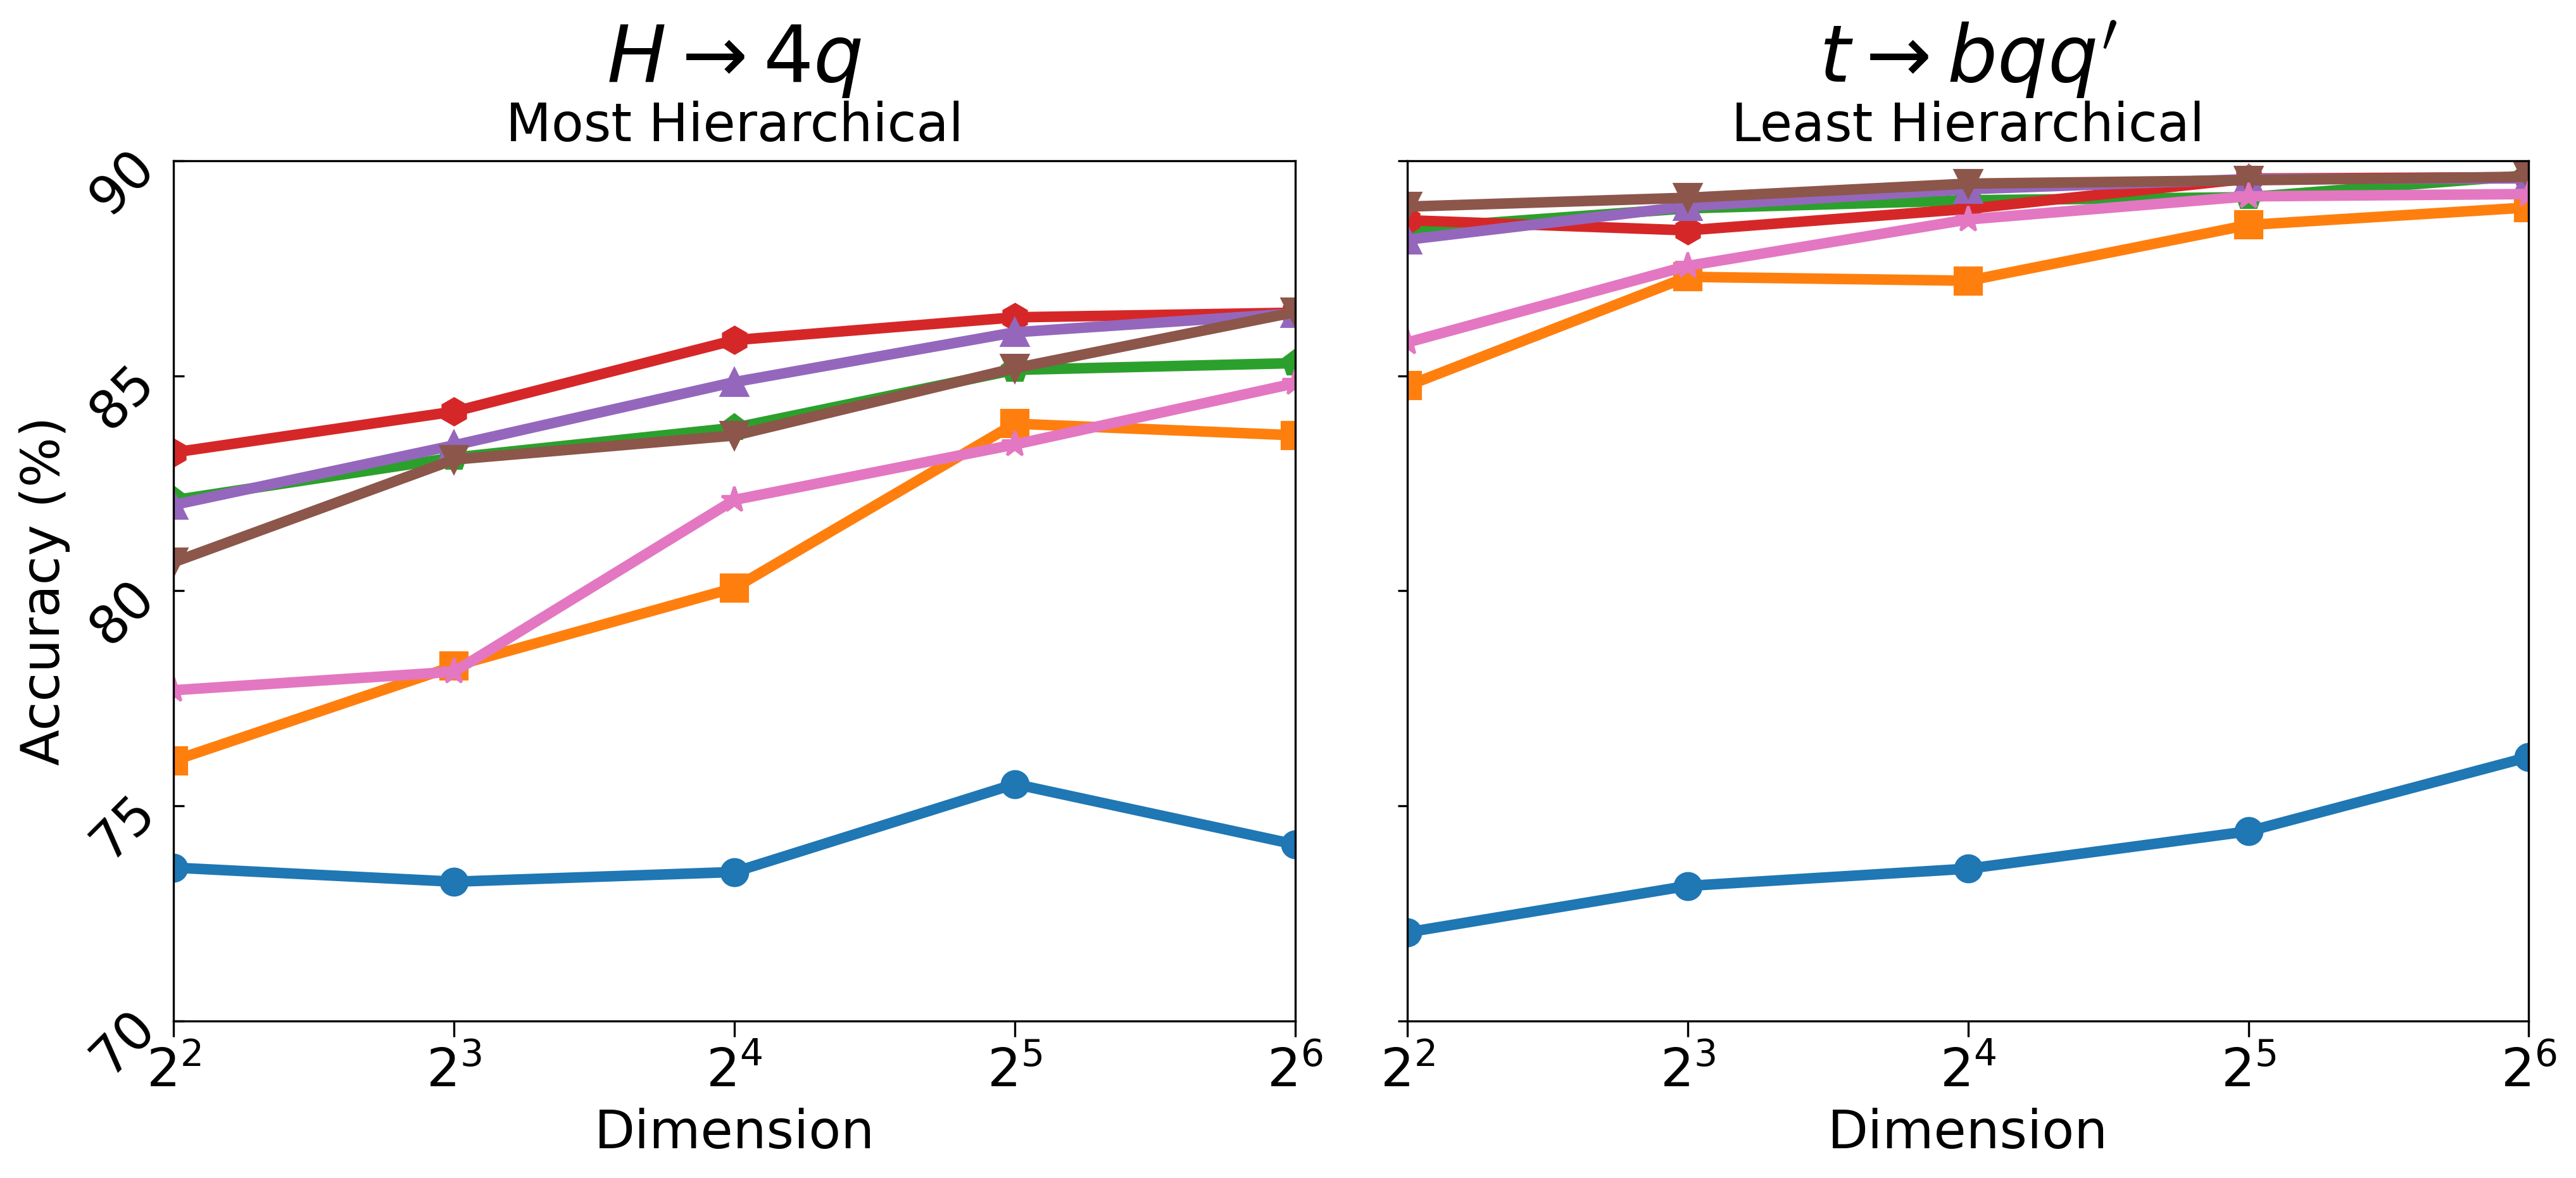

In [179]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator

# Define a list of colors to use
colors = itertools.cycle(plt.cm.tab10.colors)  # Use a color cycle from the 'tab10' colormap

# Create figure with GridSpec to control spacing
fig = plt.figure(figsize=(16, 6), dpi=300)

# Create GridSpec layout with more control over subplot spacing
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)  # wspace controls the distance between subplots

# Create subplots with more distance between them
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)

markers = ['o', 's', 'p', 'h', '^', 'v', '*', 'x']  # Define markers

# Function to calculate and print error bar sizes
def print_error_bars(bars_list, label):
    for i, bars in enumerate(bars_list):
        for bar_line in bars:  # Loop through each LineCollection in the tuple
            error_bar_segments = bar_line.get_segments()  # Directly use get_segments() on LineCollection
            lower_bounds = [seg[0][1] for seg in error_bar_segments]  # The first point in each segment is the lower bound
            upper_bounds = [seg[1][1] for seg in error_bar_segments]  # The second point in each segment is the upper bound
            print(f"{label} Error Bars (Line {i}):")
            print(f"Lower Bounds: {lower_bounds}")
            print(f"Upper Bounds: {upper_bounds}")
            print(f"Error Bar Sizes: {[ub - lb for ub, lb in zip(upper_bounds, lower_bounds)]}")

# Step 2: Plot the error bars for lines_h4q on ax1 with solid lines and markers
bars_h4q_list = []  # Store the error bar LineCollections
for i, line in enumerate(lines_h4q):  # Now expecting Line2D objects
    x_data = line.get_xdata()  # Get x data
    y_data = line.get_ydata()  # Get y data
    
    # If error bars are stored in a separate list (e.g., yerr_h4q), you need to pass them here
    yerr_data = yerr_h4q[i] if 'yerr_h4q' in locals() else None
    
    color = next(colors)  # Get the next color from the cycle
    # The third returned item from plt.errorbar() is the LineCollection for error bars
    _, _, bars_h4q = ax1.errorbar(x_data, y_data, yerr=yerr_data, fmt=f'-{markers[i]}',  # Solid line with marker
                                  label=line.get_label(), linewidth=4, markersize=10, color=color)
    bars_h4q_list.append(bars_h4q)  # Store the LineCollection for later use

# Step 3: Reset the color cycle for the second set of lines
colors = itertools.cycle(plt.cm.tab10.colors)  # Reset the color cycle

# Step 4: Plot the error bars for lines_tbqq on ax2 with solid lines and markers
bars_tbqq_list = []  # Store the error bar LineCollections
for i, line in enumerate(lines_tbqq):  # Now expecting Line2D objects
    x_data = line.get_xdata()  # Get x data
    y_data = line.get_ydata()  # Get y data
    
    # If error bars are stored in a separate list (e.g., yerr_tbqq), you need to pass them here
    yerr_data = yerr_tbqq[i] if 'yerr_tbqq' in locals() else None
    
    color = next(colors)  # Get the next color from the cycle
    # The third returned item from plt.errorbar() is the LineCollection for error bars
    _, _, bars_tbqq = ax2.errorbar(x_data, y_data, yerr=yerr_data, fmt=f'-{markers[i]}',  # Solid line with marker
                                   label=line.get_label(), linewidth=4, markersize=10, color=color)
    bars_tbqq_list.append(bars_tbqq)  # Store the LineCollection for later use

# Step 5: Set the shared y-axis range for both subplots
ax1.set_ylim(70, 90)
ax2.set_ylim(70, 90)
ax1.set_xlim(4, 64)
ax2.set_xlim(4, 64)
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_title(f'$H \\rightarrow 4q$', fontsize=30, pad=30)
ax1.text(0.5, 1.07, "Most Hierarchical", fontsize=20, ha='center', va='top', transform=ax1.transAxes)

ax2.set_title(f'$t \\rightarrow bqq\'$', fontsize=30, pad=30)
ax2.text(0.5, 1.07, "Least Hierarchical", fontsize=20, ha='center', va='top', transform=ax2.transAxes)

ax1.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax1.tick_params(axis='y', which='major', labelsize=20, labelcolor='black', direction='in', length=4)
ax2.tick_params(axis='x', which='major', labelsize=20, labelcolor='black', direction='out', length=6)
ax2.tick_params(labelleft=False)

plt.setp(ax1.get_yticklabels(), rotation=45, ha="right")  # Rotate the y-tick labels by 45 degrees

y_ticks = MultipleLocator(5)  # Set the increment to 5

# Apply the locator to the y-axis
ax1.yaxis.set_major_locator(y_ticks)

# Step 6: Add vertical line to separate the plots visually
fig.subplots_adjust(wspace=0.05)  # Adjust the space between subplots

# Step 7: Label both axes
ax1.set_xlabel("Dimension", fontsize=20)
ax2.set_xlabel("Dimension", fontsize=20)
ax1.set_ylabel("Accuracy (%)", fontsize=20)

# Step 8: Add legends (make sure to avoid duplicates)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combine legends for unique labels
combined_legend = dict(zip(labels_1 + labels_2, lines_1 + lines_2))

# Check if there are any handles and labels to add to the legend
if combined_legend:
    # Sort the legend items
    sorted_handles_labels = sorted(zip(combined_legend.values(), combined_legend.keys()), key=lambda x: (len(x[1]), x[1].lower()))
    
    if sorted_handles_labels:  # Ensure there are items to unpack
        sorted_handles, sorted_labels = zip(*sorted_handles_labels)
        
        # Add the sorted legend to one of the axes (you can adjust which axis displays it)
        ax2.legend(
            sorted_handles, sorted_labels, loc='center', fontsize=30, frameon=False, ncol=1,
            bbox_to_anchor=(1.25, 0.5),  # Positions the legend outside the right edge
            borderaxespad=0
        )

# Print error bar sizes for both H4Q and TBQQ
print_error_bars(bars_h4q_list, "H4Q")
print_error_bars(bars_tbqq_list, "TBQQ")

# Show the plot
plt.show()


In [6]:
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

signals = ['Hbb', 'Hcc', 'Hgg', 'H4q', 'Hqql', 'Tbqq', 'Tbl', 'Wqq', 'Zqq', 'QCD']
plot_rejections(JetClass_df,title = 'JetClass tagging',rejection=70,classes = signals, variable_to_vary='jet_dim', filter_values=filter_values)

Hbb


KeyError: 'jet_geom'

<Figure size 720x576 with 0 Axes>

Hbb


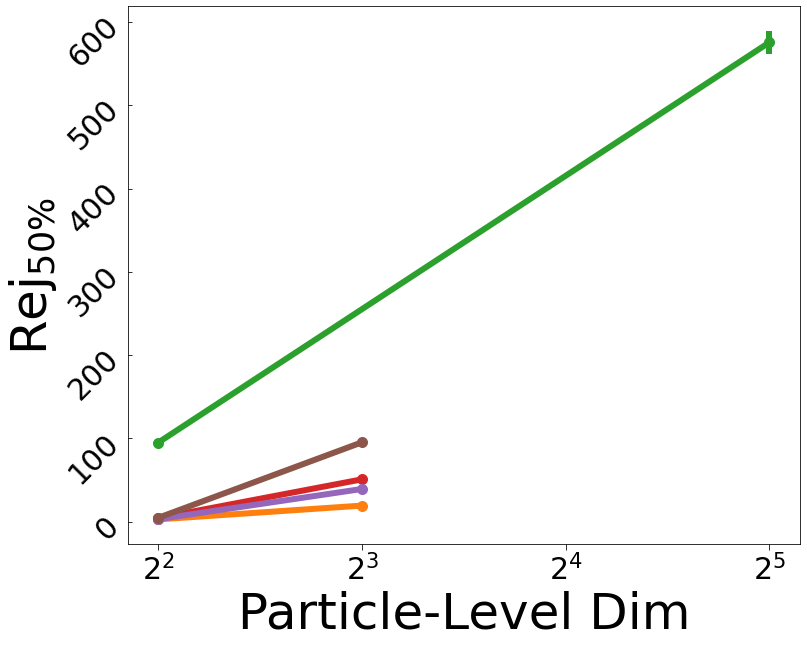

Hcc


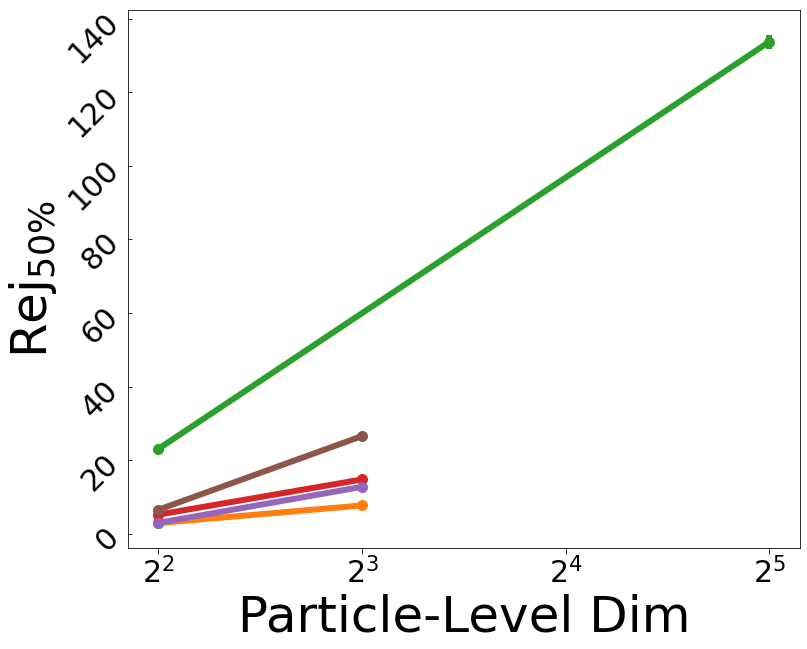

Hgg


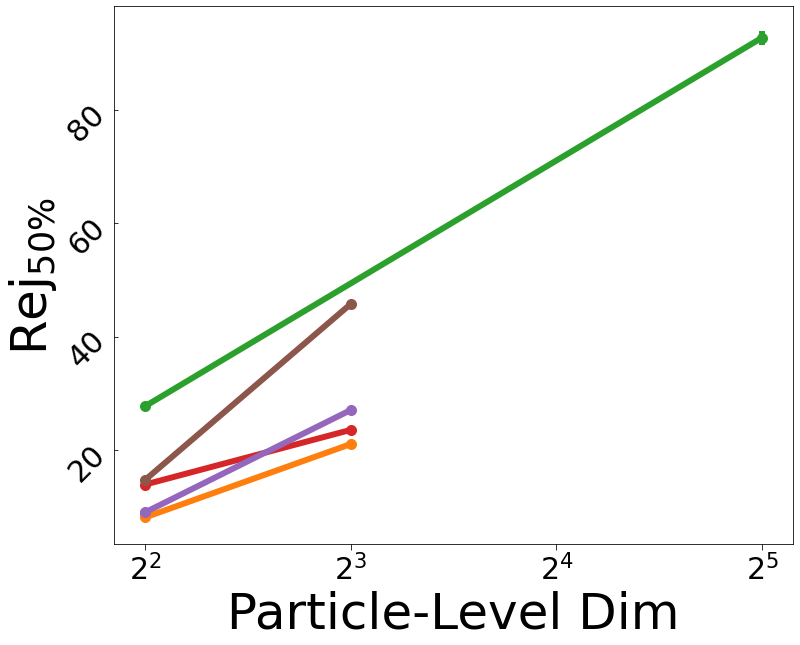

H4q


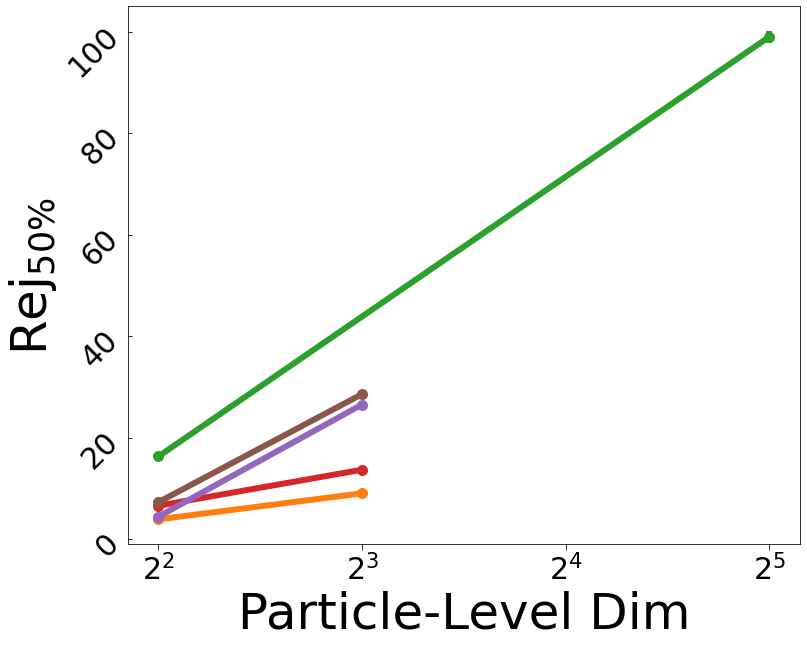

Hqql


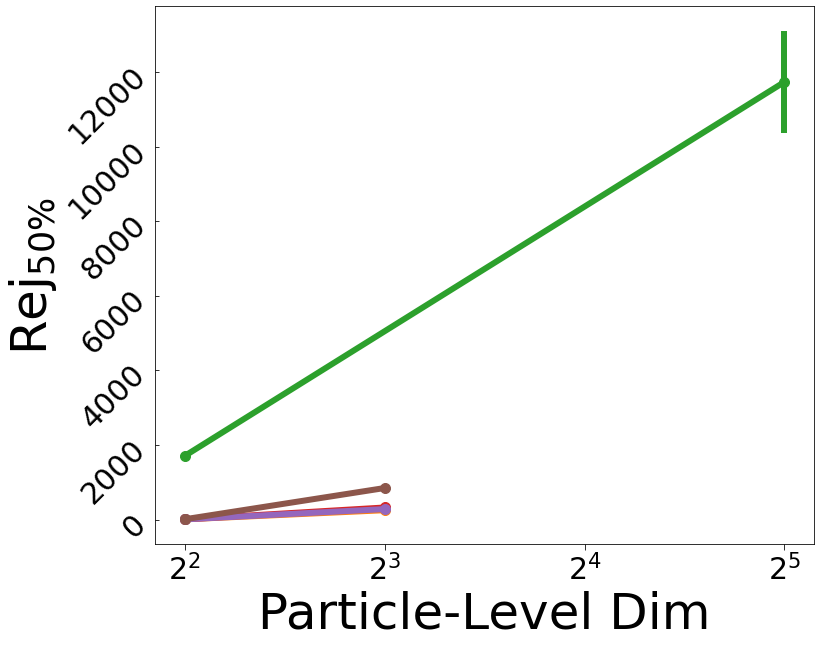

Tbqq


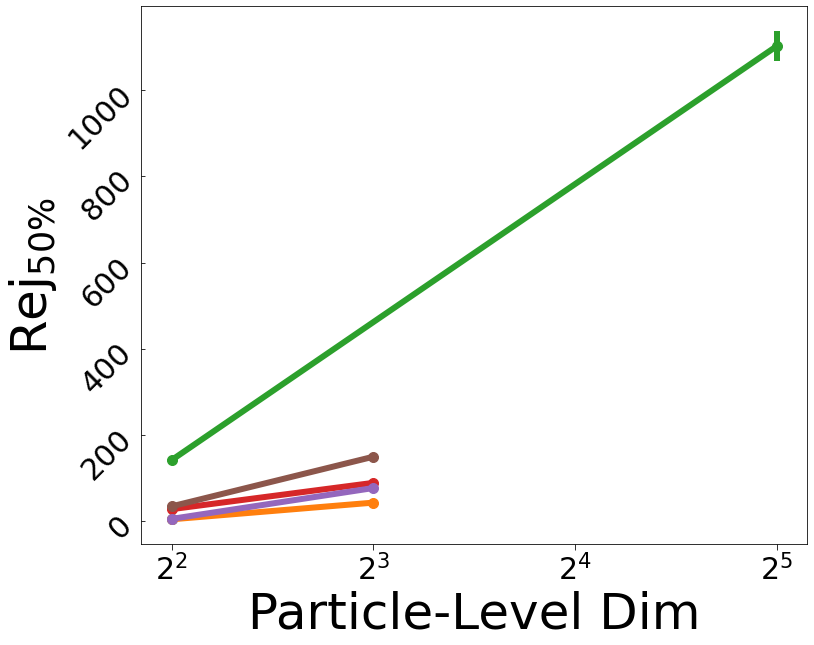

Tbl


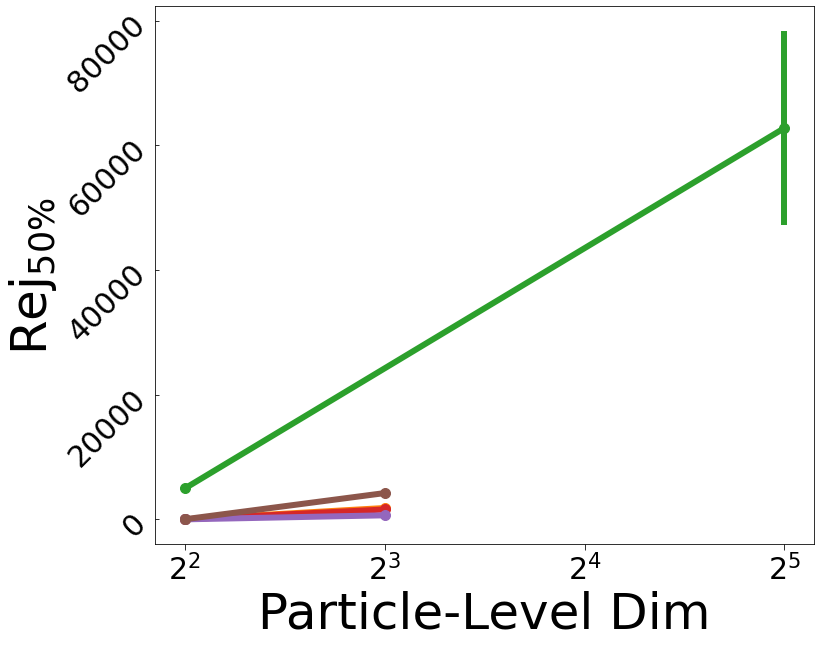

Wqq


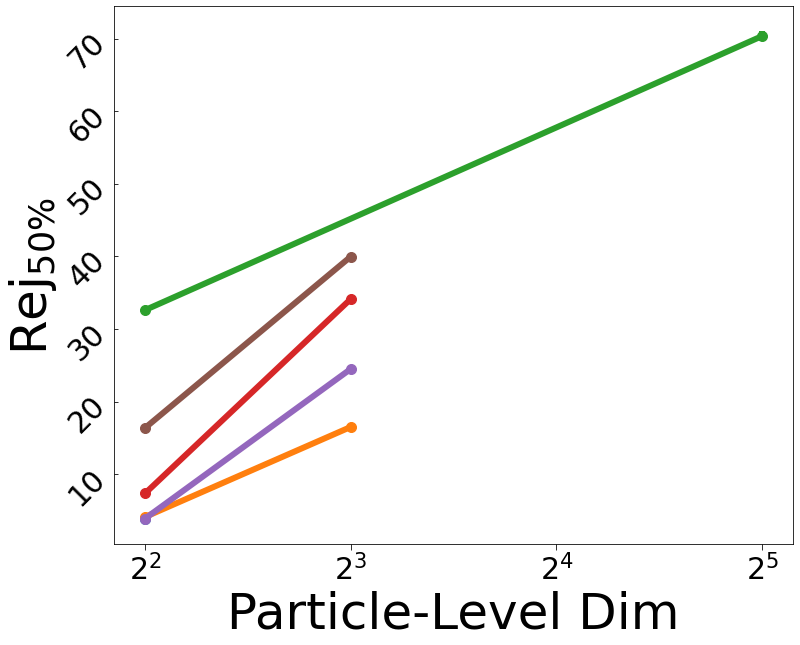

Zqq


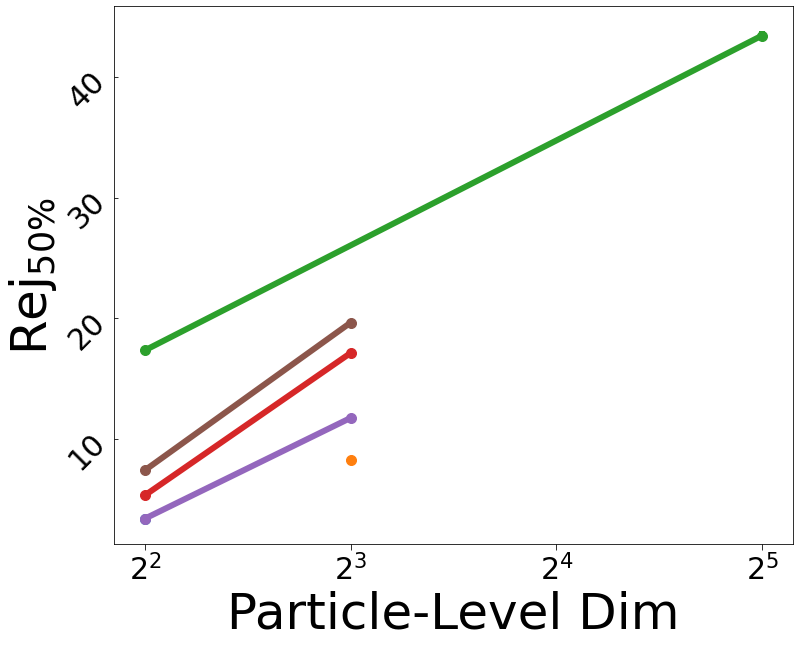

QCD


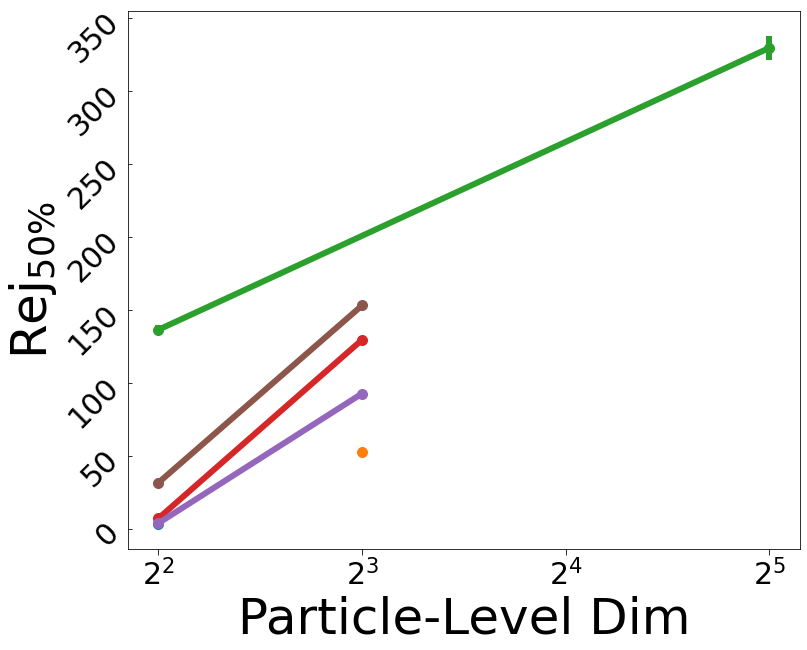

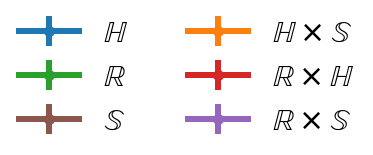

In [75]:
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 32
}

signals = ['Hbb', 'Hcc', 'Hgg', 'H4q', 'Hqql', 'Tbqq', 'Tbl', 'Wqq', 'Zqq', 'QCD']
plot_rejections(results_df,title = 'JetClass tagging',rejection=50,classes = signals, variable_to_vary='particle_dim', filter_values=filter_values)

In [60]:
import pandas as pd

# Load the DataFrame
results_df = pd.read_csv('TopLandscape_processed_performance.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']] = split_columns.iloc[:, -4:]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

# Multiply 'jet_dim' by 2 if the length of 'jet_geom' is greater than 1
results_df['jet_dim'] = results_df.apply(
    lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
    axis=1
)


# Remove duplicates by keeping the row with the highest overall_accuracy
results_df = results_df.sort_values('overall_accuracy', ascending=False).drop_duplicates(
    subset=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'], keep='first'
)

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index

# Optionally drop the now redundant columns
results_df.drop(columns=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'], inplace=True)

Top_df = results_df
# Print or display the DataFrame to check the structure
# print(results_df.head())
    

top


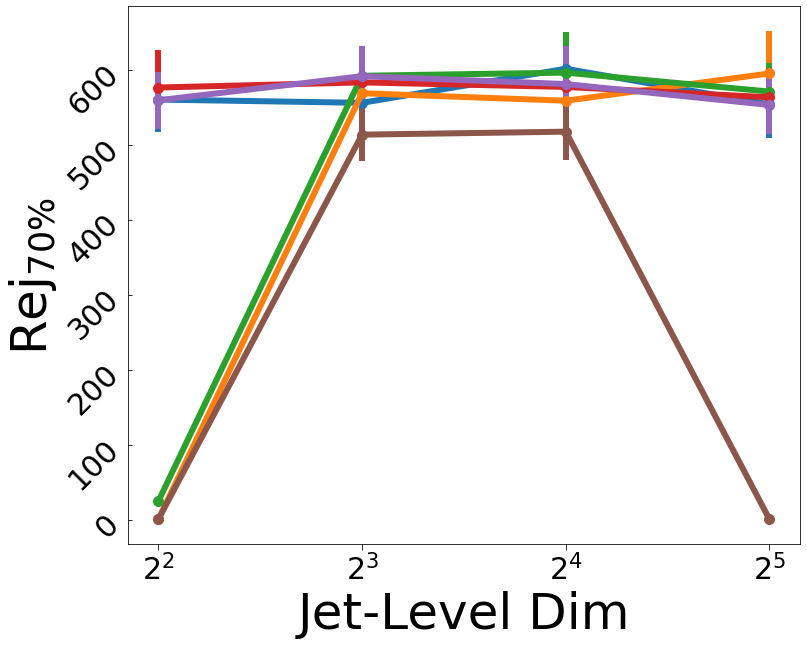

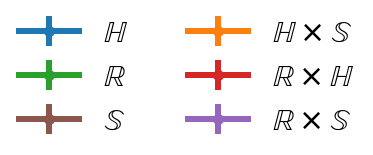

In [61]:
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

signals = ['top']
plot_rejections(Top_df,title = 'Top tagging',rejection=70,classes = signals, variable_to_vary='jet_dim', filter_values=filter_values)

top


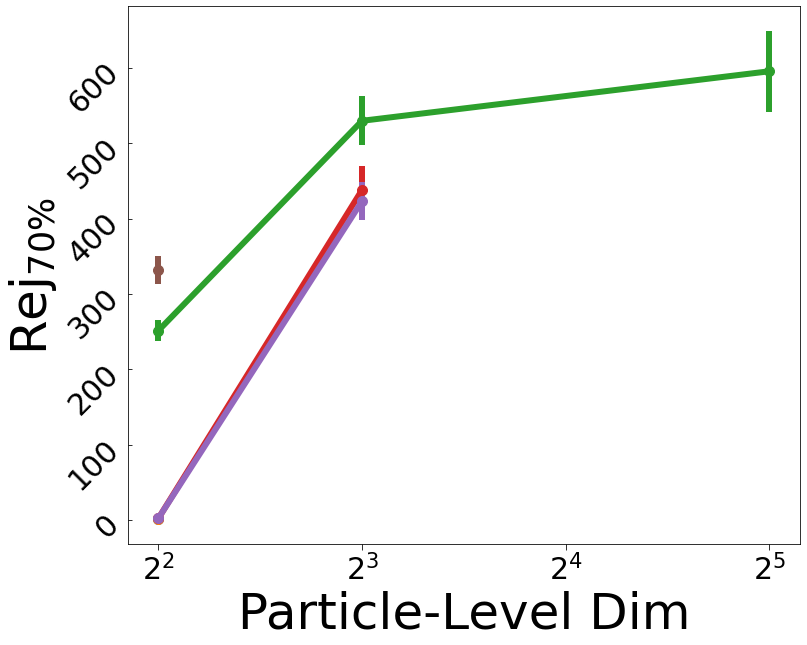

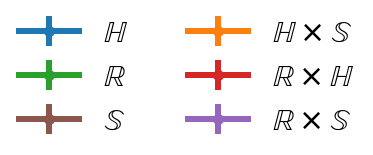

In [62]:
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 16
}

signals = ['top']
plot_rejections(Top_df,title = 'JetClass tagging',rejection=70,classes = signals, variable_to_vary='particle_dim', filter_values=filter_values)

In [63]:
import pandas as pd

# Load the DataFrame
results_df = pd.read_csv('QuarkGluon_processed_performance.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']] = split_columns.iloc[:, -4:]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

# Multiply 'jet_dim' by 2 if the length of 'jet_geom' is greater than 1
results_df['jet_dim'] = results_df.apply(
    lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
    axis=1
)


# Remove duplicates by keeping the row with the highest overall_accuracy
results_df = results_df.sort_values('overall_accuracy', ascending=False).drop_duplicates(
    subset=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'], keep='first'
)

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index

# Optionally drop the now redundant columns
results_df.drop(columns=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'], inplace=True)

QG_df = results_df
# Print or display the DataFrame to check the structure
    

top


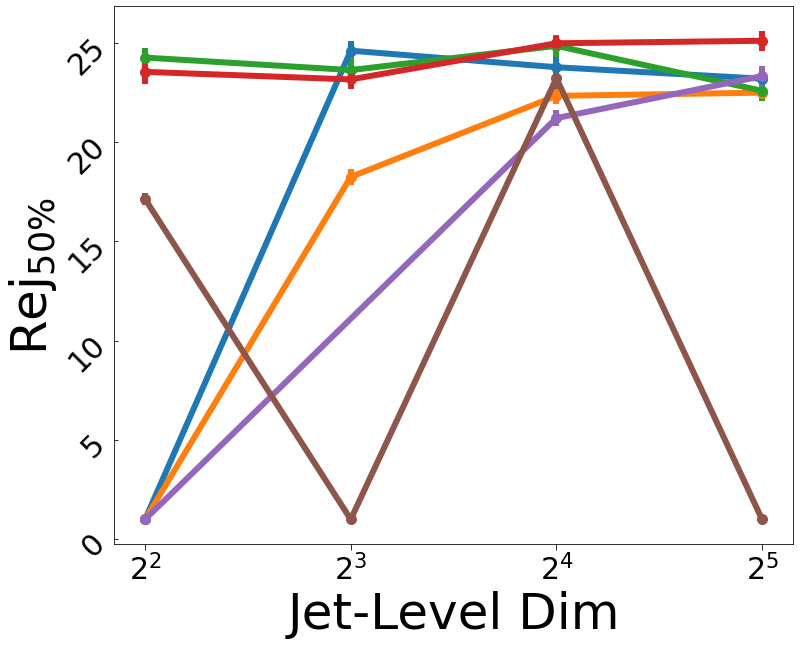

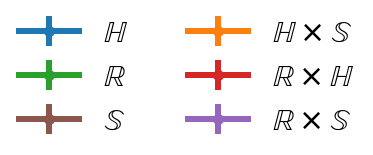

In [71]:
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

signals = ['top']
plot_rejections(QG_df,title = 'QG tagging',rejection=50,classes = signals, variable_to_vary='jet_dim', filter_values=filter_values)


top


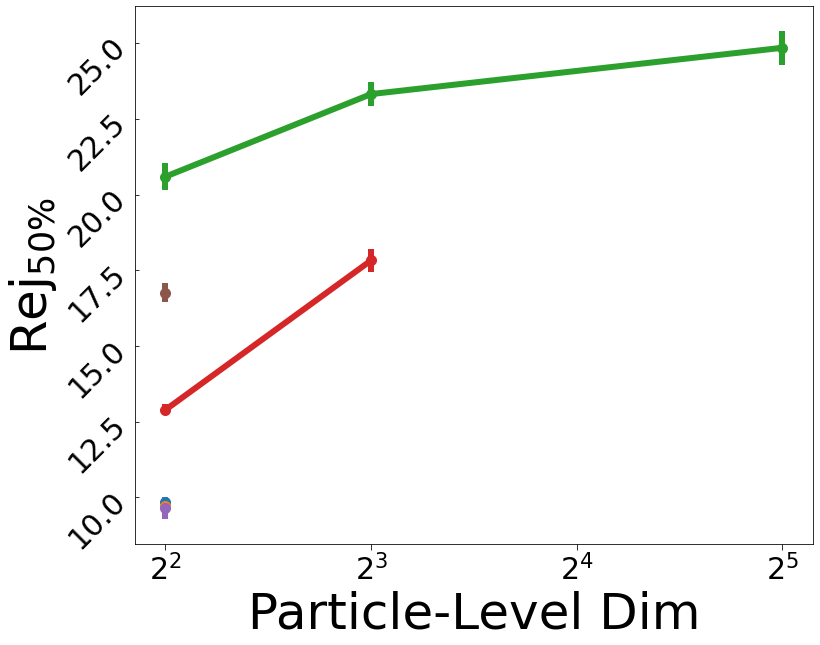

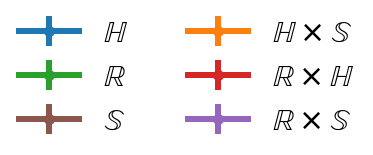

In [70]:
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 16
}

signals = ['top']
plot_rejections(QG_df,title = 'QG tagging',rejection=50,classes = signals, variable_to_vary='particle_dim', filter_values=filter_values)